✔️ What we are doing?

We are importing three important libraries:

NumPy → for numerical operations

Pandas → for loading and manipulating dataset

Matplotlib → for visualizations during EDA

✔️ Why it is required?

Almost every ML project begins with these.

Pandas helps us read and explore the data.

NumPy is internally used by ML algorithms.

Matplotlib allows plotting data distributions, correlations, outliers, etc.
This forms the foundation for preprocessing and EDA.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

✔️ What we are doing?

We are loading the dataset file laptop_data.csv into a pandas DataFrame.

✔️ Why it is required?

Every ML model needs structured data.

.read_csv() is the most common way to import a CSV dataset.

df will store the dataset so we can perform cleaning, preprocessing and feature engineering.

In [59]:
# df -> dataframe
df = pd.read_csv('laptop_data.csv')

✔️ What we are doing?

We are viewing the first 5 rows of the dataset.

✔️ Why it is required?

Helps us quickly understand the structure of the dataset.

Shows column names, data types, basic patterns.

Helps verify if the dataset loaded correctly.
This is the standard first step in EDA (Exploratory Data Analysis).

In [60]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [61]:
# Shows the number of rows and columns in the dataset.
# WHAT: Returns a tuple (rows, columns)
# WHY: Helps us understand dataset size. More rows → better training.  
df.shape

(1303, 12)

In [62]:
# Displays detailed information about the dataset.
# WHAT: Shows column names, data types, non-null counts, memory usage.
# WHY: Very important for EDA. 
#     - Helps identify numerical vs categorical features
#     - Shows which columns have missing values
#     - Helps plan preprocessing steps
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


📌 Key Points About Dataset
✔️ It’s a mixed feature dataset

Dataset Contains: Categorical features, Text-based features, Numeric features, Useless features (index)

So we need proper preprocessing.

🛠️ Feature Engineering Required (very important)

1️⃣ Remove Unnamed: 0
This is just an index. No meaning.

2️⃣ Convert Ram from “8GB” → 8
Because ML algorithms work on numbers only.

3️⃣ Convert Weight from “1.37kg” → 1.37

4️⃣ Parse ScreenResolution
Examples:
    “IPS Panel Retina Display 2560x1600”
    “Full HD 1920x1080”
    “1440x900”
    We will extract: Resolution width (2560), Resolution height (1600)
    Calculate PPI (Pixels per inch) → important feature
    Whether IPS panel is present

5️⃣ Parse Cpu
We will simplify to:
CPU brand (Intel, AMD, etc.)
CPU series (i5, i7, Ryzen 5, etc.)
CPU speed (GHz)
This improves model accuracy.

6️⃣ Parse Memory
Memory column contains: SSD, HDD, Flash Storage, Hybrid combinations

We will convert it into: 
    - SSD size
    - HDD size
    - Flash size
    - Hybrid size

7️⃣ Parse Gpu
Extract GPU brand: Intel, AMD, NVIDIA, etc.
GPU brand strongly affects laptop price.


🎯 Goal
Convert raw, messy text features → clean numerical & categorical features.
This is what makes your ML model accurate.

In [63]:
# ✔️ What this does?
# df.duplicated() → checks every row and returns True if the row is a duplicate of a previous row.
# .sum() → counts how many True values exist.
# So the final output tells you how many duplicate rows your dataset contains.
df.duplicated().sum()

# int(df.duplicated().sum())

np.int64(0)

In [64]:
# Checking missing values in each column.
# WHAT: Shows how many null (NaN) values exist per column.
# WHY: Missing values must be handled before model training.
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [65]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [66]:
# ----------------------------
# Feature Engineering Started
# ----------------------------

# Dropping the 'Unnamed: 0' column.
# WHAT: This column is just an index accidentally saved during CSV export.
# WHY: It does not contain any useful information for prediction.
#      Removing useless/unnecessary features improves model performance.
df.drop(columns=['Unnamed: 0'], inplace=True)


In [67]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [68]:
# Removing the 'GB' text from the 'Ram' column.
# WHAT: 'Ram' column contains values like '8GB', '16GB'.
# WHY: Machine learning models require numerical values, not text.
#      So we convert '8GB' → '8'.
df['Ram'] = df['Ram'].str.replace('GB', '')

# Removing the 'kg' text from the 'Weight' column.
# WHAT: 'Weight' column contains values like '1.37kg'.
# WHY: Remove text so we can convert them into numeric values.
df['Weight'] = df['Weight'].str.replace('kg', '')

In [69]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [70]:
# Converting 'Ram' column values into integers.
# WHAT: Converts string values like '8' → 8
# WHY: ML algorithms need numeric data to learn patterns.
df['Ram'] = df['Ram'].astype('int32')

# Converting 'Weight' column values into float numbers.
# WHAT: Converts string values like '1.37' → 1.37
# WHY: Numeric conversion is required for scaling and model training.
df['Weight'] = df['Weight'].astype('float32')


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


Now, Let's do some Data Analysis - Perform EDA.

Imports seaborn, a statistical data visualization library.

✔️ Why?
Seaborn provides advanced, better-looking plots compared to matplotlib.
We use it for Exploratory Data Analysis (EDA) to understand patterns, distribution, correlations, etc.

In [72]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

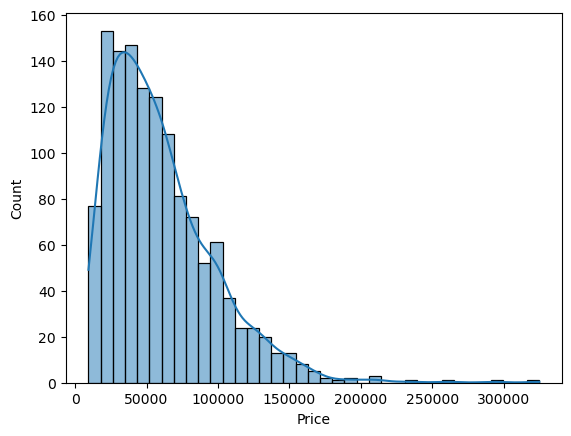

In [73]:
# sns.distplot(df['Price'])  # Depricated in new version
sns.histplot(df['Price'], kde=True)

# ✔️ What?
# - This plots the distribution curve + histogram of the Price column.

# ✔️ Why?
# - Price is your target variable
#  Before building a model, we must understand:
#  Is price normally distributed? No
#  Is it skewed (right/left)? Yes
#  Are there extreme values? No

# This helps decide whether we need transformations (like log scaling).

<Axes: xlabel='Company'>

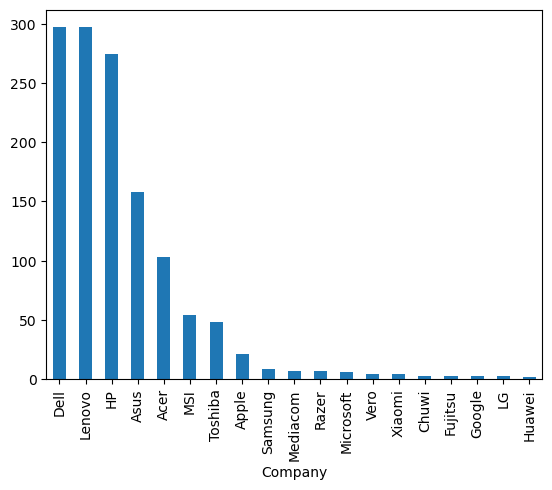

In [24]:
# ================================================
# Company-wise count → Which brands sell more?
# ================================================

df['Company'].value_counts().plot(kind='bar')
# WHAT: Shows how many laptops each brand has in the dataset.
# WHY: High-frequency brands give a clearer picture of price distribution.
#      Also helps check dataset imbalance. If a brand appears very few times,
#      model may not learn its price pattern well.

# Example:
# Dell, HP, Lenovo appear more → model learns stable pricing.
# Razer, LG appear very few → model may struggle to predict correctly.


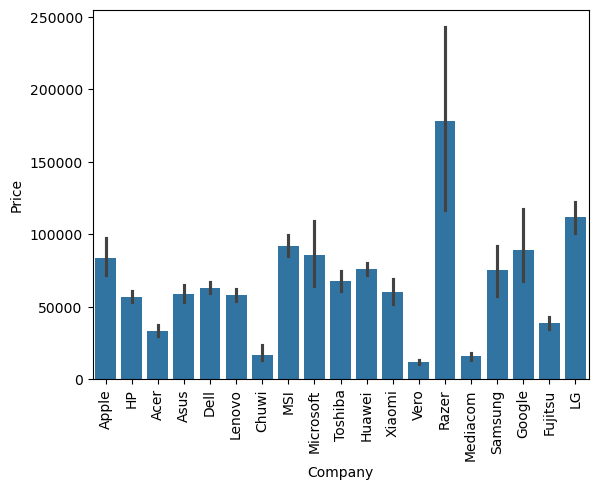

In [74]:
# =========================================================
# 2️⃣ Company vs Price → Does brand affect laptop pricing?
# =========================================================

sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# WHAT: Shows average price per brand.
# WHY: Brand is a strong predictor of price.
#      Premium brands (Apple, MSI) have higher average prices.
#      Budget brands (Acer, HP) have lower average prices.

# IMPROVEMENT IN MODEL:
# Brand becomes a powerful categorical feature.
# Your model learns: "If Company = Apple → likely high price"


<Axes: xlabel='TypeName'>

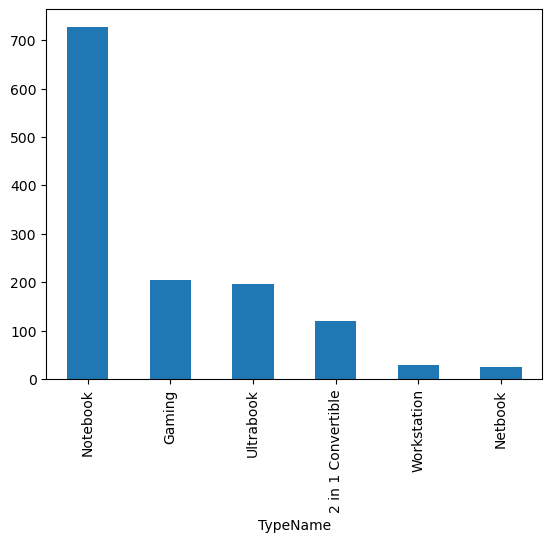

In [75]:
# ============================================
# 3️⃣ TypeName frequency → Which laptop types?
# ============================================

df['TypeName'].value_counts().plot(kind='bar')

# WHAT: Shows counts of Notebook / Ultrabook / Gaming / 2-in-1 etc.
# WHY: Type strongly correlates with price.
#      Gaming > Ultrabook > Notebook > (budget laptops)

# This helps the model identify "category-based price groups".


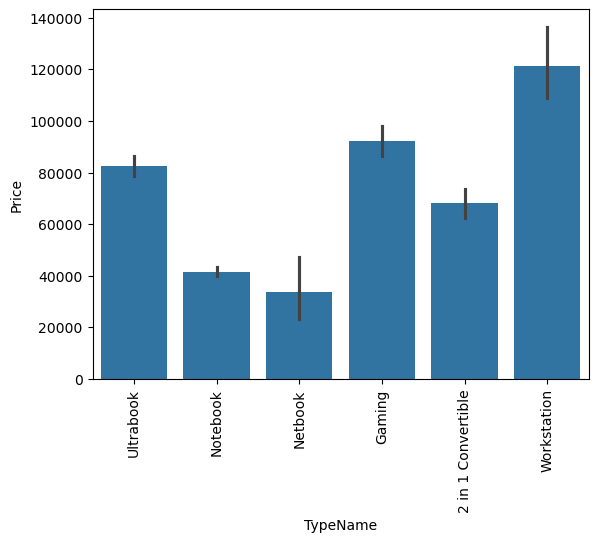

In [76]:
# ========================================================
# 4️⃣ TypeName vs Price → Does laptop type affect pricing?
# ========================================================

sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# WHAT: Shows average price for each laptop category.
# WHY: Type is a premium indicator.
#      Gaming laptops cost more due to GPU.
#      2-in-1 laptops cost more due to touchscreen.
#      Notebooks cost less.

# Gives the model a clear relationship to learn.


<Axes: xlabel='Inches', ylabel='Count'>

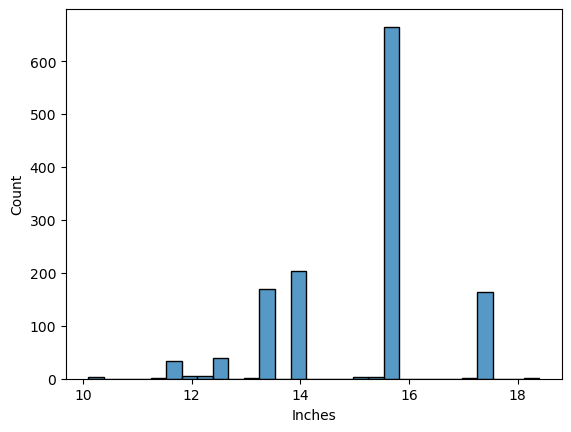

In [77]:
# =====================================
# 5️⃣ Distribution of Inches (Histogram)
# =====================================

sns.histplot(df['Inches'])

# WHAT: Shows common screen sizes.
# WHY: To understand the range of sizes.
#      Extreme values (e.g., 18-inch) may be outliers.


<Axes: xlabel='Inches', ylabel='Price'>

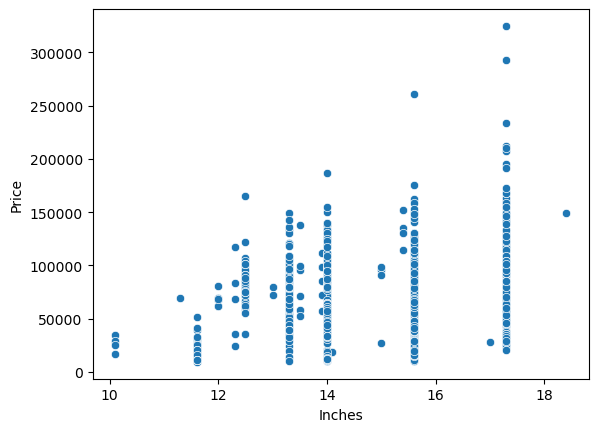

In [78]:
# ========================================================
# 6️⃣ Inches vs Price (Scatterplot) – Why this is better?
# ========================================================

sns.scatterplot(x=df['Inches'], y=df['Price'])

# WHAT: Shows how laptop size influences price.
# WHY (important):
#     ➤ A scatterplot shows correlation, not just frequency.
#     ➤ Bigger screens often mean premium laptops → higher price.
#     ➤ You can visually detect trends:
#         - 11–13 inch → budget laptops
#         - 14–15 inch → mid-range laptops
#         - 17 inch → gaming laptops → high price
#
# HOW THIS IMPROVES THE MODEL:
# Inches becomes a numeric feature that captures strong linear trends
# → better performance for tree-based and linear models.


ScreenResolution Analysis :-

This is useful because: The column is currently dirty and unstructured

Contains both:
- Resolution (1920x1080)
- Panel type (IPS)
- Touchscreen info

We must break it into separate engineered features.

In [79]:
df['ScreenResolution'].value_counts()
# To check how many different types are available

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [80]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

# WHAT: Creates a binary column → 1 if touchscreen present, else 0.

# WHY: Touchscreen laptops are always more expensive.

# MODEL BENEFIT:
# New feature captures premium pricing.
# Tree models (RF, XGBoost) will strongly use this.

In [81]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.2000,0
861,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,AMD Radeon R7 M465,Windows 10,1.84,71874.7200,0
462,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,39906.7200,0
374,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,46300.8528,1
57,Asus,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,31232.2032,0


<Axes: xlabel='Touchscreen'>

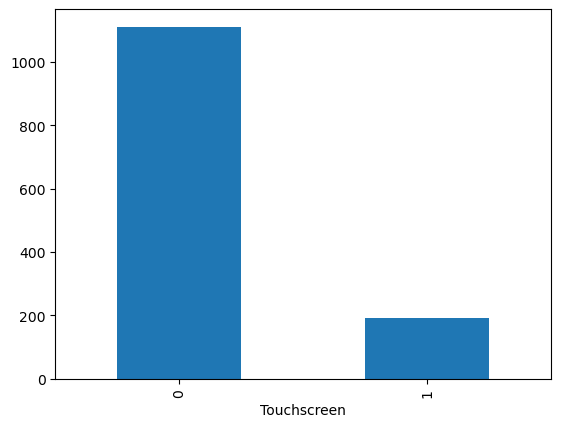

In [82]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen'>

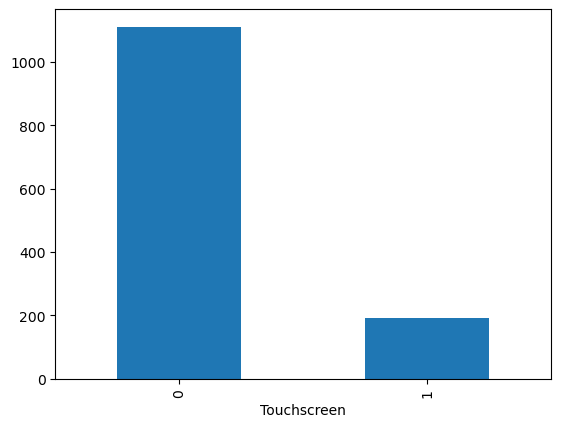

In [83]:
df['Touchscreen'].value_counts().plot(kind='bar')

# WHAT : This code plots how many laptops in the dataset have:
# 1 → touchscreen
# 0 → non-touchscreen

# WHY : This helps to check: Is touchscreen rare? Is touchscreen common? Is the feature balanced? (Important for ML)

# MODEL BENEFIT
# - If touchscreen = rare, the model learns:
# - Touchscreen = premium feature → higher prices
# Tree models will split like:
# if Touchscreen = 1 → price increases

<Axes: xlabel='Touchscreen', ylabel='Price'>

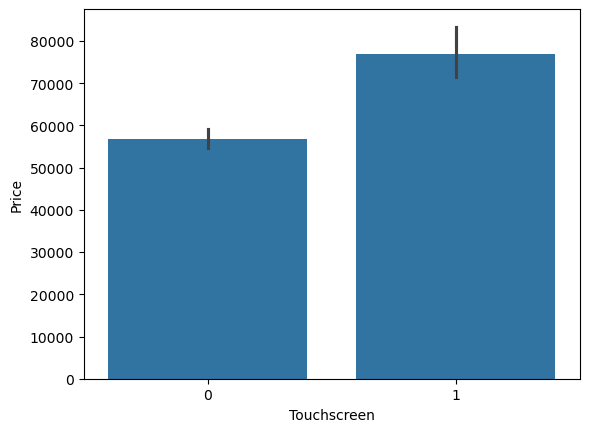

In [84]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

# WHAT
# - Shows the average price of: Touchscreen laptops and Non-touchscreen laptops

# ✔️ WHY
# This visually proves whether touchscreen increases the price.

# ✔️ MODEL BENEFIT
# The model captures “touchscreen adds value”, improving:
# Price predictions for hybrid/2-in-1 laptops
# Differentiating premium models
# Reducing prediction error for high-end devices

In [85]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

# ✔️ WHAT
# Creates new column: 1 → laptop has IPS panel, 0 → no IPS panel

# ✔️ WHY
# IPS panels are premium:
# Better colors
# Higher viewing angle
# Found in expensive ultrabooks/gaming laptops

# ✔️ MODEL BENEFIT
# The model learns that:
# IPS = high price
# TN = cheaper price

# Improves prediction on mid/high-end laptops.

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

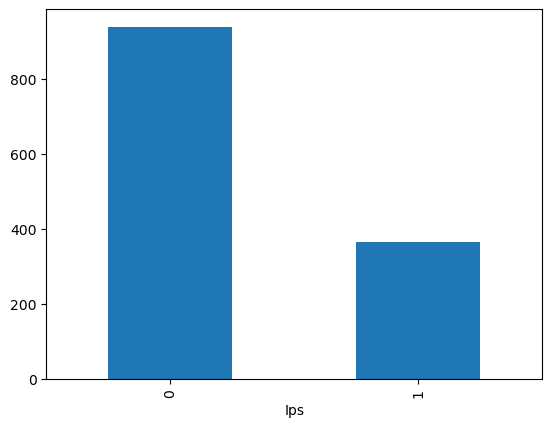

In [86]:
df['Ips'].value_counts().plot(kind='bar')

# ✔️ WHAT
# Shows how many laptops have IPS vs non-IPS screens.

# ✔️ WHY
# Feature distribution check:
# If IPS is rare → strong premium indicator
# If common → weaker indicator

# ✔️ MODEL BENEFIT
# Knowing the distribution helps model avoid:
# Overfitting
# Bias when IPS appears rarely
# Better pricing segmentation.

<Axes: xlabel='Ips', ylabel='Price'>

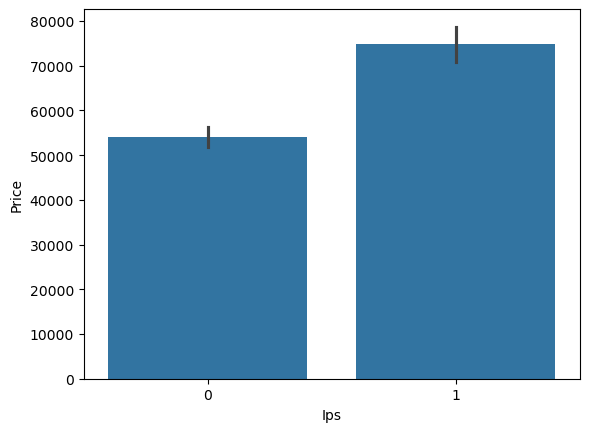

In [87]:
sns.barplot(x=df['Ips'], y=df['Price'])


# ✔️ WHAT
# Shows average price of: IPS laptops, Non-IPS laptops

# ✔️ WHY
# To prove visually that IPS laptops cost more.

# ✔️ MODEL BENEFIT
# Model learns: IPS → premium → higher price, No IPS → standard → lower price
# This reduces prediction errors for ultrabooks/gaming laptops.

✅ Split Resolution into X and Y

✔️ WHAT : Splits this string: 1920x1080 , into two parts : ['1920', '1080']

✔️ WHY
To extract numerical resolution features: X resolution, Y resolution

✔️ MODEL BENEFIT
- Screen resolution strongly affects price:
- Higher resolution = higher price
- 4K laptops cost much more
- Numeric features allow the model to learn resolution vs price relationship.

In [88]:
new = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [89]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [90]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
633,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,30849.12,0,0,Full HD 1920,1080
1098,HP,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,1.96,26640.00,0,0,1366,768
466,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Nvidia GeForce GTX 940MX,Windows 10,2.20,24988.32,0,0,1366,768
1198,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4,1TB HDD,Intel HD Graphics 500,Linux,2.10,14492.16,0,0,1366,768
602,Acer,Notebook,14.0,Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.60,17529.12,0,0,Full HD 1920,1080


In [91]:
# X_res still contains words like: Full HD 1920, Touchscreen 2256, IPS Panel Full HD 1920

# So before extracting the numbers, we first need to remove all characters except digits.

# Extract ONLY numbers from X_res
# Important: use regex properly


# CODE :-
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


# CODE EXPLAINATION :-
# .str.replace(',', '') -> Removes commas from the string.

# .str.findall(r'(\d+\.?\d+)') -> findall() with a regex returns all numbers found inside the string.
# Regex explained:
# \d+ → one or more digits
# \.? → optional decimal point
# \d+ → one or more digits again
# Entire group (\d+\.?\d+) extracts numbers like: 1920, 1080, 2256, 1504

# .apply(lambda x: x[0]) -> Takes the first number from the list returned by findall.
# findall() returns a list, but we need a single value, so we pick index 0.

In [50]:
# 📌 BUT Important Note
# Your string still contains words like: "Full HD 1920", "Touchscreen 2256"

# So a cleaner and simpler solution is:

# df['X_res'] = df['X_res'].str.extract(r'(\d+)')


# This directly extracts the 1st number — no list, no lambda needed.

In [92]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [94]:
# Converting Resolutions from Object to int.

df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [95]:
# df.corr()['Price'] # Giving Error, due to some non-numeric column values
df.corr(numeric_only=True)['Price']


# df.corr() → calculates the correlation matrix of ALL numerical columns in the DataFrame.
# ['Price'] → selects the correlation values of every feature with the target column "Price".

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

✅ WHY we use this

We use correlation because it helps us understand:

✔️ Which features increase the laptop price

(e.g., RAM, screen resolution, CPU speed)

✔️ Which features do not matter much

(e.g., Inches might have very low correlation)

✔️ Which features may need transformation

If correlation is low, but logically important, we can engineer better features
(e.g., PPI instead of X_res/Y_res)

✔️ Helps us avoid multicollinearity

(When two features are highly correlated with each other)

This step gives us a science-based understanding of what influences laptop price.

✅ HOW It Helps the Machine Learning Model

Correlation helps improve your laptop price predictor by:

🔹 (1) Identifying strong predictors

Features with high correlation
→ contribute more
→ improve model accuracy

Example:
RAM, X_res, Y_res, PPI usually have high correlation.

🔹 (2) Identifying weak or useless features

If a feature has very low correlation with Price → it can be removed.

This reduces noise and overfitting.

🔹 (3) Feature Engineering decisions become easier

If X_res and Y_res are moderately correlated but not very high,
we combine them into:

PPI = sqrt(X_res^2 + Y_res^2) / Inches


→ PPI dramatically improves correlation with Price.
→ Improves model performance.

🔹 (4) Helps in choosing algorithms

If relationships are non-linear (low correlation),
then tree-based models (Random Forest, XGBoost) will perform better.

In [96]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')


# 💡 Why we create PPI?
# Higher pixel density = costlier laptop
# ScreenResolution, X_res, Y_res, Inches are multicollinear
# PPI is a single numerical feature summarizing screen sharpness

In [99]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [100]:
# Dropping the raw ScreenResolution
df.drop(columns=['ScreenResolution'], inplace=True)
df.head()

# Good decision because this column is now replaced by: Touchscreen, Ips, X_res, Y_res, ppi

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [101]:
# Dropping Inches, X_res, Y_res after creating PPI
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)
df.head()

# ✔️ This is 100% correct because:

# You extracted all useful information:
# Resolution → X_res, Y_res
# Sharpness → ppi
# Touchscreen → binary feature
# IPS panel → binary feature
# Now these columns are redundant and can be removed to avoid multicollinearity.

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


FeatureEngineering on CPU Column

In [102]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [104]:
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

# What this does:
# If CPU = "Intel Core i7 8550U 1.8GHz" .split() → ['Intel','Core','i7','8550U','1.8GHz']

# First 3 words → 'Intel Core i7', So "Intel Core i7 8550U 1.8GHz" becomes: Intel Core i7

# This is good, because now we simplify CPU into a manageable form.

In [105]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [106]:
df['Cpu Name'].value_counts()

Cpu Name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
AMD A6-Series A6-9220         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
Intel Xeon E3-1535M           2
Intel Atom X5-Z8350           2
Intel Atom x5-Z8300           1
AMD E-Series 6110             1
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD FX 9830P                  1

In [109]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


# I have reduces the CPU Categories into 5 major groups, which are easily noticible (Samsung is not included, because it's count is 1, So, We can neglect it).

In [110]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

# Now the column contains values like:
# - Intel Core i7, Intel Core i5, Intel Core i3, Other Intel Processor, AMD Processor

# This is clean and ready for one-hot encoding.

In [111]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [114]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
888,Acer,Netbook,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,15824.1600,0,1,135.094211,Intel Celeron Dual,Other Intel Processor
224,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,130873.7952,0,1,127.335675,Intel Core i7,Intel Core i7
988,Dell,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,39906.7200,0,0,100.454670,Intel Core i7,Intel Core i7
248,HP,Notebook,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49,35964.0000,0,1,165.632118,Intel Core i5,Intel Core i5
752,Asus,Notebook,Intel Core i5 6300HQ 2.3GHz,4,1TB HDD,Nvidia GeForce GTX 950M,No OS,2.45,30849.1200,0,0,100.454670,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

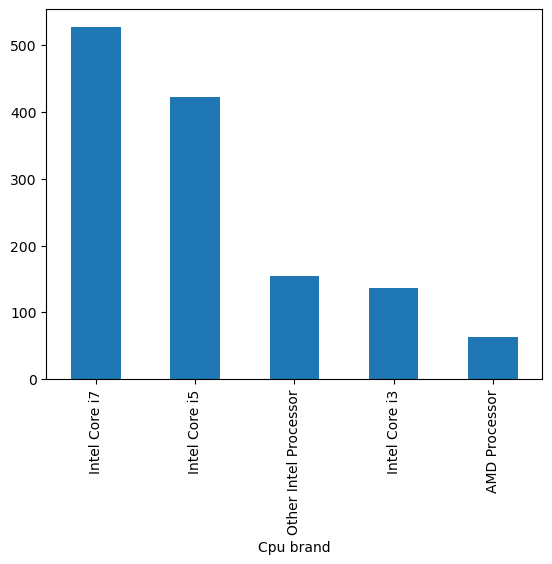

In [115]:
df['Cpu brand'].value_counts().plot(kind='bar')
# This shows how many laptops fall into each CPU group.

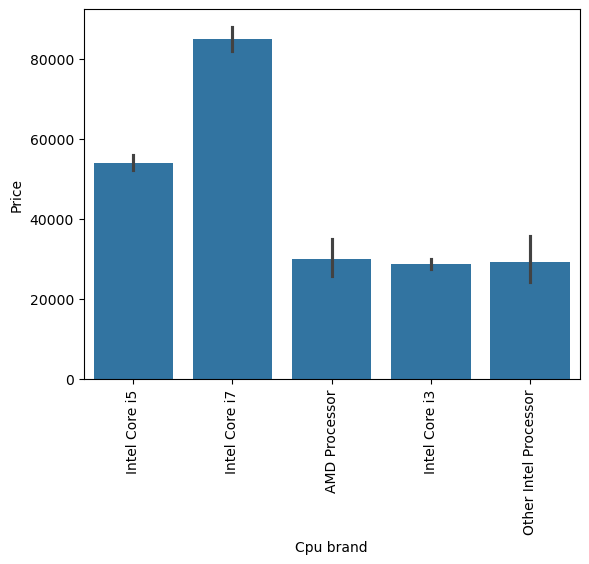

In [116]:
sns.barplot(x=df['Cpu brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

✔ What this shows: Average price of laptops for each CPU category.

You can often see:
- i7 → highest
- i5 → medium-high
- i3 → medium
- Other Intel → lower
- AMD → varies but usually lower

This confirms CPU performance correlates with price.

You engineered CPU → now drop unnecessary raw columns.

In [117]:
df.drop(columns=['Cpu','Cpu Name'], inplace=True)

In [118]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


Now, perform Feature Egineering on RAM column

In [1]:
df['Ram'].value_counts().plot(kind='bar')

NameError: name 'df' is not defined

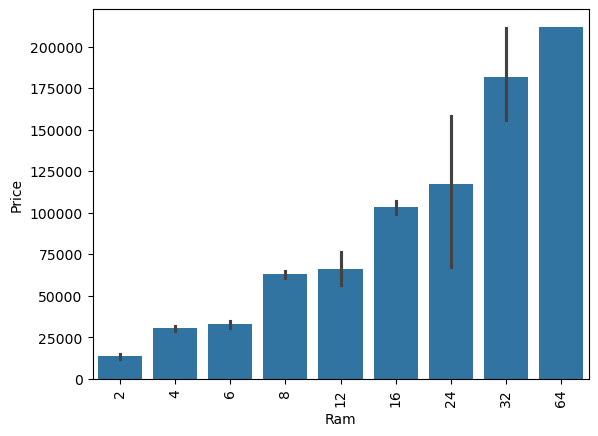

In [120]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Now Perform Feature Engineering on 'Memory' Column

In [121]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [132]:
# Converts everything to string. Removes “.0” from strings like "1.0TB" → "1TB".Because Memory values sometimes come like "1.0TB" which breaks splitting.
# df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
# Removes "GB" from strings. "256GB SSD" → "256 SSD". Because We don't need text units; only numeric values.
# df["Memory"] = df["Memory"].str.replace('GB', '')
# Converts TB → GB. Example: "1TB" becomes "1000" (because "1" + "000"). Because All memory capacities must be in the same unit (GB).
# df["Memory"] = df["Memory"].str.replace('TB', '000')
# Splits string at "+". "128 SSD + 1TB HDD" → first = "128 SSD " second = " 1TB HDD". Because Many laptops have dual storage (SSD + HDD).
# new = df["Memory"].str.split("+", n = 1, expand = True)



# Creates first memory part. Removes extra spaces. Creates second memory part (may be NaN)
# df["first"]= new[0]
# df["first"]=df["first"].str.strip()
# df["second"]= new[1]


# Checks first memory part and flags: 
# Text Contains	          Flag
# HDD	                Layer1HDD = 1
# SSD	                Layer1SSD = 1
# Hybrid	            Layer1Hybrid = 1
# Flash	                Layer1Flash_Storage = 1
# We must detect type (HDD/SSD/Hybrid/Flash). ML gets storage type separately.
# df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
# df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
# df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
# df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


# Removes all non-numeric characters."128 SSD" → "128". Because We need only numeric size.
# df['first'] = df['first'].str.replace(r'\D', '', regex=True)



# If no second storage → treat as 0 GB.
# df["second"].fillna("0", inplace = True)



# Same type detection for second memory part.
# df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
# df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
# df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
# df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)




# Get numeric GB from the second part.
# df['second'] = df['second'].str.replace(r'\D', '', regex=True)



# Numeric conversion → Needed for math operations.
# df["first"] = df["first"].astype(int)
# df["second"] = df["second"].astype(int)




# Computes the final, correct memory capacity for each type.
# df["HDD"]=(df["first"]*df["Layer1HDD"] + df["second"]*df["Layer2HDD"])
# df["SSD"]=(df["first"]*df["Layer1SSD"] + df["second"]*df["Layer2SSD"])
# df["Hybrid"]=(df["first"]*df["Layer1Hybrid"] + df["second"]*df["Layer2Hybrid"])
# df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"] + df["second"]*df["Layer2Flash_Storage"])

# Example:
# "128GB SSD + 1TB HDD" →
# Column	   Value
# HDD	       1000
# SSD	       128
# Hybrid   	    0
# Flash	        0
# Each storage type becomes a separate numeric feature.


# Models learn: SSD increases price, HDD decreases portability, Flash & Hybrid performance, Multiple disks affect price
# This is highly predictive.




# Removes unnecessary helper columns. To Keep Dataset clean.
# df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
#        'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
#        'Layer2Flash_Storage'], inplace=True)


In [127]:
# 1. Normalize memory text
df['Memory'] = df['Memory'].astype(str).str.replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')

# 2. Split into two parts
new = df["Memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1]

# 3. Detect types *before cleaning*
df["Layer1HDD"] = df["first"].str.contains("HDD", regex=False).astype(int)
df["Layer1SSD"] = df["first"].str.contains("SSD", regex=False).astype(int)
df["Layer1Hybrid"] = df["first"].str.contains("Hybrid", regex=False).astype(int)
df["Layer1Flash_Storage"] = df["first"].str.contains("Flash Storage", regex=False).astype(int)

df["Layer2HDD"] = df["second"].fillna("").str.contains("HDD", regex=False).astype(int)
df["Layer2SSD"] = df["second"].fillna("").str.contains("SSD", regex=False).astype(int)
df["Layer2Hybrid"] = df["second"].fillna("").str.contains("Hybrid", regex=False).astype(int)
df["Layer2Flash_Storage"] = df["second"].fillna("").str.contains("Flash Storage", regex=False).astype(int)

# 4. Remove all non-numeric chars
df["first"] = df["first"].str.replace(r'\D', '', regex=True)
df["second"] = df["second"].fillna("0").str.replace(r'\D', '', regex=True)

# 5. Convert to integer
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# 6. Create final memory columns
df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]
df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]
df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]
df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]

# 7. Drop unnecessary columns
df.drop(columns=[
    'first','second',
    'Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
    'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'
], inplace=True)


In [128]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
151,Dell,Gaming,8,1000 Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62,47898.7200,0,0,141.211998,Intel Core i7,0,0,1000,0
532,Asus,Notebook,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.00,69210.7200,0,1,282.423996,Intel Core i7,1000,256,0,0
1054,Dell,Ultrabook,16,1000 SSD,Intel HD Graphics 620,Windows 10,1.20,120093.1200,1,0,276.053530,Intel Core i7,0,1000,0,0
1158,Lenovo,Notebook,8,1000 Hybrid,AMD Radeon R5 M330,Windows 10,2.50,42010.7472,0,0,141.211998,Intel Core i5,0,0,1000,0
94,Asus,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.25,55890.7200,0,0,157.350512,Intel Core i7,0,256,0,0


In [129]:
df.drop(columns=['Memory'],inplace=True)

In [130]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [133]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

Now, Perform Feature Engineering on GPU Column.

In [163]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

C:\Users\Sagar\AppData\Local\Temp\ipykernel_11176\44803004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)


In [164]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [134]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [136]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [137]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [138]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [139]:
df[df['Gpu Brand'] == 'ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,0,32,ARM


In [140]:
df = df[df['Gpu Brand'] != 'ARM']
# Removing 'ARM' brand GPU. Because it is only 1.

In [141]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

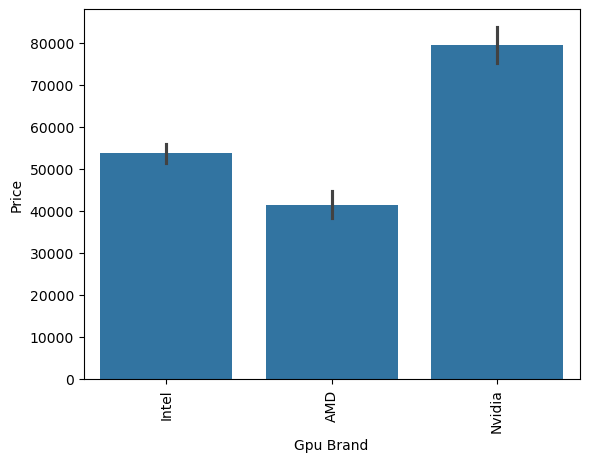

In [144]:
# Checking, Will there be any effect on price, due to Gpu Brand...
sns.barplot(x=df['Gpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [145]:
df.drop(columns=['Gpu'],inplace=True)

C:\Users\Sagar\AppData\Local\Temp\ipykernel_11176\1111925144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [146]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


Feature Engineering on Operating System Column

In [149]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

- Here, we are thinking to reduce the Category... like we can Combine All 'Windows' (10, 7, 10S) in a single category.
- Similarly, All 'Mac OS' in a Single Category, And the rest OS in a single category.
- But First, we should check that how much an OS is effecting in Predicting the price.

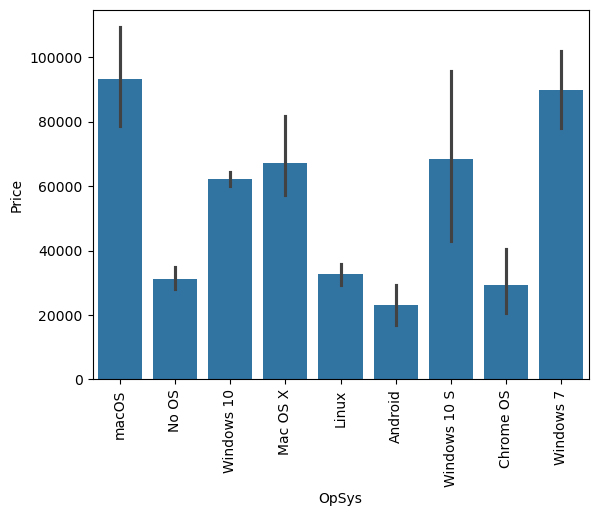

In [150]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [152]:
# To Categorise OS, we are writting a Function Category_OS as 'cat_os'
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [153]:
df['os'] = df['OpSys'].apply(cat_os)

C:\Users\Sagar\AppData\Local\Temp\ipykernel_11176\3648919379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [154]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [155]:
df.drop(columns=['OpSys'], inplace=True)

C:\Users\Sagar\AppData\Local\Temp\ipykernel_11176\2632010566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'], inplace=True)


In [156]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


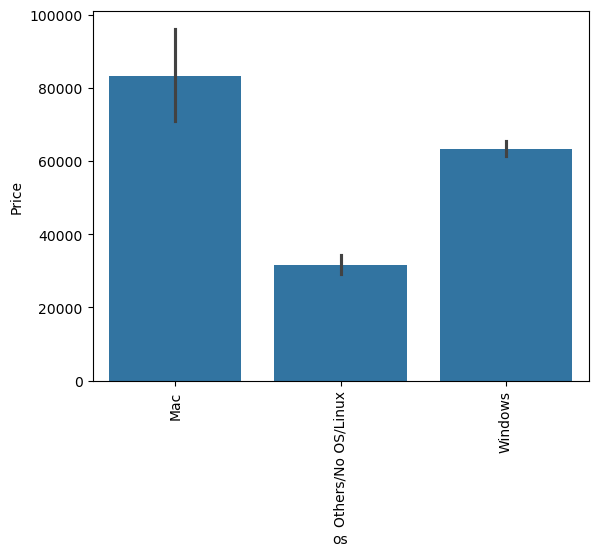

In [157]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Now, Performing Feature Engineering on 'Weights' Column. (Where, Weight is a Continuous Variable)

C:\Users\Sagar\AppData\Local\Temp\ipykernel_11176\2274463774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

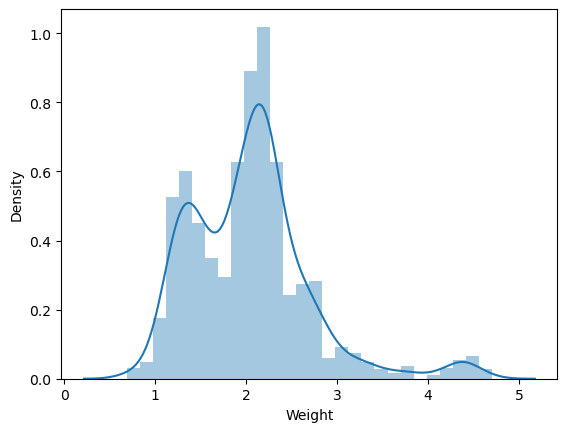

In [158]:
sns.distplot(df['Weight'])

# Distribution Plot — Understanding Shape of Data
# Helps you understand:
# - Is Weight normally distributed?
# - Is it skewed?
# - Are there outliers?
# This is the correct first step for continuous variables.

<Axes: xlabel='Weight', ylabel='Price'>

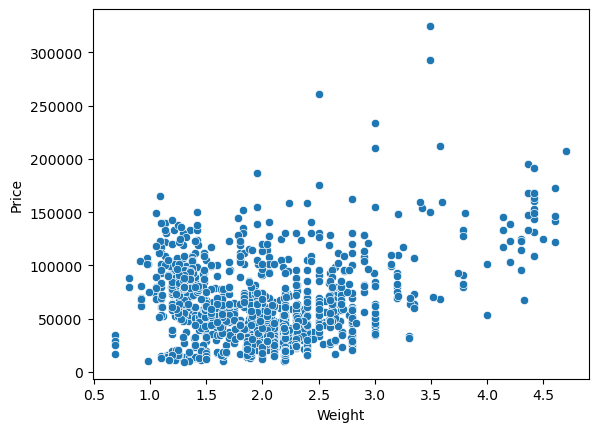

In [159]:
sns.scatterplot(x=df['Weight'], y=df['Price'])
# Scatter Plot — Relationship with Target
# ✔ Helps you see:
# - Is the relationship linear / non-linear?
# - Does weight increase/decrease the price?
# - Are there clusters (gaming laptops vs thin laptops)?

# Scatter plot is the best visualization for continuous variable vs price.

In [165]:
df.corr(numeric_only=True)['Price']

# Correlation Value — Numerical Check
# ✔ Shows numeric correlation between Weight and Price.
# If Weight has:
# - Positive correlation → heavier laptops cost more
# - Negative correlation → lighter laptops cost more
# - Weak correlation → maybe remove (after checking feature importance)

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

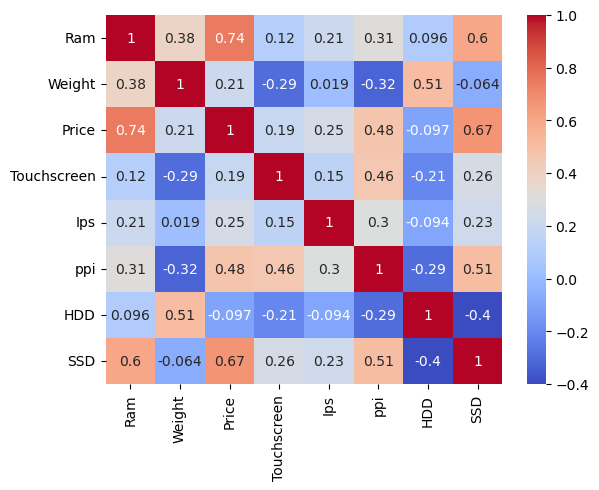

In [167]:
# sns.heatmap(df.corr())

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# df.corr() by default tries to compute correlation for all columns — including non-numeric columns

✔ numeric_only=True,
Tells pandas to only compute correlation for numeric columns.

✔ annot=True,
Shows correlation values inside boxes.

✔ cmap='coolwarm',
Gives a clean red–blue gradient (you can omit it if you want default color).

Now Working on Target Variable/Column

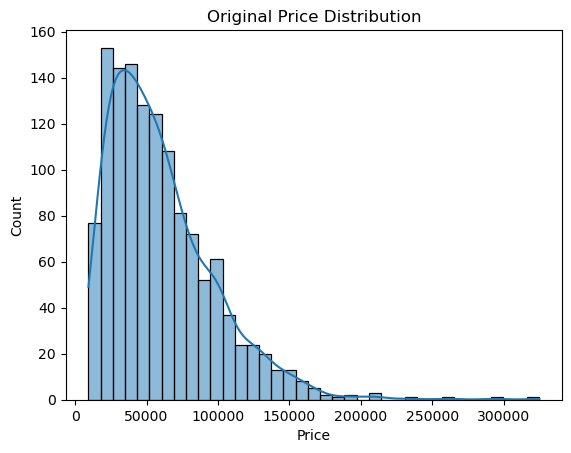

In [168]:
sns.histplot(df['Price'], kde=True)
plt.title("Original Price Distribution")
plt.show()

You can clearly see right skew, because some laptops are extremely expensive.
Right-skewness hurts model performance (especially Linear Regression).

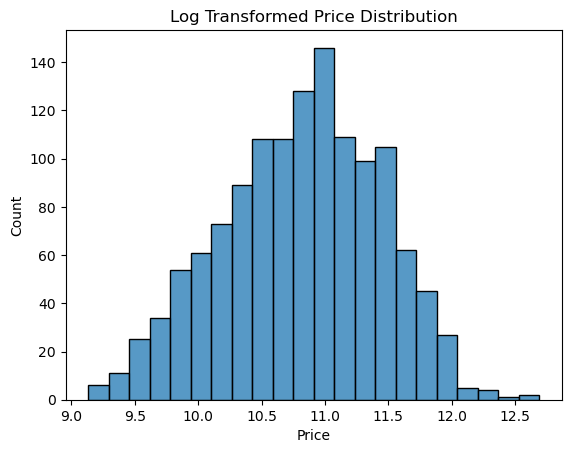

In [170]:
sns.histplot(np.log(df['Price']))
plt.title("Log Transformed Price Distribution")
plt.show()

📌 Why Use Log Transformation? (Short Summary)
- Reduces Right Skew: Converts long-tailed distributions into more normal (bell-shaped) ones.
- Handles Outliers: Compresses large values so extreme points do not dominate model training.
- Stabilizes Variance: Fixes heteroscedasticity (where large values have higher variance).
- Improves Linearity: Many relationships become more linear after log transform → better for regression.
- Boosts Model Performance: Usually increases R² score and reduces MAE/RMSE because the model learns patterns more clearly.

In simple words:
👉 Log transform makes skewed data cleaner, stable, and easier for ML models to learn.

Now, Use Dataset for training the Model

In [171]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [172]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [173]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

Train-Test Split

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=2
)

# test_size=0.15 : Means 15% of the data will be used for testing, and 85% will be used for training

# random_state=2 : This controls the random splitting. If you use the same random_state every time, you will always get the same split.Helps in making your results reproducible.
# Example: If you don’t set random_state → different split every run. If you set random_state=2 → same split every run.

In [176]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [177]:
y_train

183     10.651384
1141    11.016798
1049     9.638174
1020    10.655148
878     10.791749
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1193    11.034319
Name: Price, Length: 1106, dtype: float64

In [178]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454670,Other Intel Processor,500,0,Intel,Others/No OS/Linux
1251,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel,Others/No OS/Linux
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,100.454670,AMD Processor,500,0,AMD,Others/No OS/Linux
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,0,256,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,165.632118,Intel Core i7,0,256,Intel,Windows


In [179]:
y_test

248     10.490274
555      9.387207
1251     9.964522
547     10.111883
885     11.470547
          ...    
1129    11.004649
172      9.708902
322     10.973157
996     11.182680
470     11.575963
Name: Price, Length: 196, dtype: float64

In [189]:
# On Categorical Columns (Company, Typename, Cpu brand, Gpu brand, os), Apply one hot encoding, Using log transformation along with scikit learn pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [191]:
# XGBoost is not part of scikit-learn.So, we've to install it separately because it uses C++ core libraries
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/72.0 MB 13.8 MB/s eta 0:00:06
   --- ------------------------------------ 7.1/72.0 MB 21.7 MB/s eta 0:00:03
   ------ --------------------------------- 12.1/72.0 MB 22.7 MB/s eta 0:00:03
   --------- ------------------------------ 17.0/72.0 MB 23.0 MB/s eta 0:00:03
   ------------ --------------------------- 22.3/72.0 MB 23.3 MB/s eta 0:00:03
   --------------- ------------------------ 27.5/72.0 MB 23.4 MB/s eta 0:00:02
   ------------------ --------------------- 32.8/72.0 MB 23.5 MB/s eta 0:00:02
   --------------------- ------------------ 38.0/72.0 MB 23.6 MB/s eta 0:00:02
   ----------------------- ---------------- 42.5/72.0 MB 23.6 MB/s eta 0:00:02
   ------------------------ --------------- 44.8/72.0 MB 22.2 MB/s eta 0:00:02
   ---------------------------- ----------- 50.9/72.0 MB 23.0 MB/s eta 0:00:01
   ------------------------------- -------- 55.8/72.0 MB 23.0 M

In [192]:
# Importing all the Algorithms, because, initially we don't know, which one will perform better
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [183]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


Linear Regression

In [185]:
# Step 1: ColumnTransformer is used to apply OneHotEncoding ONLY on categorical columns
# [0,1,7,10,11] are the column indices of categorical features
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
         [0, 1, 7, 10, 11])   # Apply OHE here
    ],
    remainder='passthrough'   # Keep remaining numerical columns as they are
)

# Step 2: Choose the ML algorithm (Linear Regression in this case)
step2 = LinearRegression()

# Step 3: Create a Pipeline so preprocessing + model training happen together
pipe = Pipeline([
    ('step1', step1),  # 1) Apply OneHotEncoding
    ('step2', step2)   # 2) Train Linear Regression model
])

# Fit the pipeline on training data 
pipe.fit(X_train, y_train)

# Predict on test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 score: 0.8073277448418701
MAE: 0.21017827976428766


Ridge Regression (L2 Regularization)
- Adds L2 penalty to reduce overfitting.
- Shrinks coefficients but never makes them zero.
- Useful when multicollinearity exists.

In [194]:
# Step 1: Apply OneHotEncoding to categorical columns
# OneHotEncoder → converts categories into dummy variables
# drop='first' → avoids dummy variable trap
# sparse_output=False → returns dense numpy array
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
         [0, 1, 7, 10, 11])  # These are categorical column indices
    ],
    remainder='passthrough'    # Keep remaining columns as they are
)

# Step 2: Ridge Model
# Ridge adds L2 regularization to reduce overfitting
step2 = Ridge(alpha=10)

# Pipeline connects preprocessing + model
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Predict on test set
y_pred = pipe.predict(X_test)

# Evaluation Metrics
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8127331031311811
MAE 0.20926802242582962


Lasso Regression (L1 Regularization)

- Adds L1 penalty which can shrink some coefficients to zero.
- Works as a feature selector.
- Very helpful when many features exist.

In [195]:
step1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     [0, 1, 7, 10, 11])
], remainder='passthrough')

# Lasso performs feature selection using L1 regularization
step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


KNN Regression
- Predicts a value based on the average of K-nearest neighbors.
- Works well for simple patterns; bad for high dimensions.

In [196]:
step1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     [0, 1, 7, 10, 11])
], remainder='passthrough')

# KNN predicts using the K-nearest neighbors
step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.8027675291937718
MAE 0.193456293739003


Decision Tree Regression
- Splits data into regions based on rules.
- Easy to overfit; controlled using max_depth.

In [197]:
step1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     [0, 1, 7, 10, 11])
], remainder='passthrough')

# Decision Tree learns rules using split based on reducing variance
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8435448593212076
MAE 0.18003652422796135


SVR (Support Vector Regression)
- Uses hyperplanes to fit data with a margin of tolerance.
- RBF kernel handles nonlinear patterns.

In [198]:
step1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     [0, 1, 7, 10, 11])
], remainder='passthrough')

# SVR with RBF kernel
# C controls margin hardness
# epsilon allows error within a margin
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.8083180902289917
MAE 0.2023905942719158


Random Forest Regression

- Bagging technique using many trees.
- Reduces variance, stable model.
- Good default algorithm.

In [199]:
step1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     [0, 1, 7, 10, 11])
], remainder='passthrough')

# Random Forest = Many Decision Trees + Bagging
step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


Extra Trees Regression
- Even more random than Random Forest.
- Faster, less variance.

In [201]:
step1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     [0, 1, 7, 10, 11])
], remainder='passthrough')

# ExtraTrees = More Random, Faster, Less variance
step2 = ExtraTreesRegressor(
    n_estimators=100,
    random_state=3,
    bootstrap=True,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8850720167552375
MAE 0.16154538000217084


AdaBoost Regression
- Boosting technique → corrects mistakes of earlier models.
- Sensitive to noise.

In [202]:
step1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     [0, 1, 7, 10, 11])
], remainder='passthrough')

# AdaBoost = sequential models learning from previous errors
step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.8048574584432577
MAE 0.22300364326041505


Gradient Boosting Regression
- Adds trees sequentially to reduce residual errors.
- High predictive power.

In [203]:
step1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     [0, 1, 7, 10, 11])
], remainder='passthrough')

# Gradient Boost = Add models to correct residuals of previous models
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8833280937486181
MAE 0.15943910568248465


XGBoost Regressor
- Most powerful boosting algorithm.
- Uses regularization + optimized trees.
- Very fast.

In [204]:
step1 = ColumnTransformer([
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     [0, 1, 7, 10, 11])
], remainder='passthrough')

# XGBoost = gradient boosting + regularization + parallel computation
step2 = XGBRegressor(
    n_estimators=45,
    max_depth=5,
    learning_rate=0.5
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8771404806375557
MAE 0.16262936288951352


🧠 Voting Regressor — Concept Explained (Markdown-Ready)
## 📌 What is Voting Regressor?

Voting Regressor is an Ensemble Learning technique where multiple regression models are trained separately, and their predictions are combined (averaged) to produce the final output.

It’s similar to taking advice from multiple experts instead of depending on just one.

## 🧩 How Voting Regressor Works?
1️⃣ Train multiple models independently :
Each base model (Random Forest, XGBoost, ExtraTrees, Gradient Boosting, etc.) learns the pattern from the training data on its own.

2️⃣ Combine predictions :
For a test input:

final_prediction = weighted_average(model_predictions)

- If weights are equal → simple average
- If weights differ → weighted average (more weight = more importance)

## 🎯 Why Use Voting Regressor?
✔ Reduces model overfitting
Because different models compensate for each other's limitations.

✔ Stabilizes prediction
If one model performs poorly on certain samples, other models correct it.

✔ Improves R² and reduces MAE
The combined prediction is usually more accurate than an individual model.

## 🏋️ Hard Voting vs Soft Voting?
➡ For Regression → Only averaging is possible.
Classification has Hard/Soft voting, but regression uses only averaging-based voting.

## 🏗 Your Model Architecture

Step-1: Preprocessing using ColumnTransformer

Step-2: Ensemble using VotingRegressor

You combined 4 strong regressors: Random Forest, Gradient Boosting, XGBoost & Extra Trees

You gave higher weight (5) to RandomForest → meaning “trust RF more”.

In [206]:
# Already Import above
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from xgboost import XGBRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import VotingRegressor, StackingRegressor


# -----------------------------
# STEP 1: Preprocessing
# -----------------------------
# Convert categorical columns using OneHotEncoder
# Columns [0,1,7,10,11] = categorical features
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
         [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'    # keep all other columns
)

# -----------------------------
# STEP 2: Define Base Models
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=350,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

gbdt = GradientBoostingRegressor(
    n_estimators=100,
    max_features=0.5
)

xgb = XGBRegressor(
    n_estimators=25,
    learning_rate=0.3,
    max_depth=5
)

et = ExtraTreesRegressor(
    n_estimators=100,
    random_state=3,
    bootstrap=True,
    max_samples=0.5,
    max_features=0.75,
    max_depth=10
)

# -----------------------------
# STEP 3: Voting Regressor
# -----------------------------
# Give more weight to RF (5), others receive weight (1)
step2 = VotingRegressor(
    estimators=[
        ('rf', rf),
        ('gbdt', gbdt),
        ('xgb', xgb),
        ('et', et)
    ],
    weights=[5, 1, 1, 1]
)

# -----------------------------
# STEP 4: Combine Preprocessing + Model in Pipeline
# -----------------------------
pipe = Pipeline([
    ('step1', step1),  # OneHotEncoding + passthrough
    ('step2', step2)   # Voting Regressor
])

# -----------------------------
# STEP 5: Train the Ensemble Model
# -----------------------------
pipe.fit(X_train, y_train)

# -----------------------------
# STEP 6: Predictions & Metrics
# -----------------------------
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8891624258832516
MAE: 0.15860661221453964


🧠 Stacking Regressor — Concept Explained (Markdown-Ready)
## 📌 What is Stacking?

Stacking (Stacked Generalization) is an advanced ensemble learning technique where multiple base models make predictions, and then a final model (meta-learner) learns how to best combine those predictions.

Think of it like this:

“Each model gives its opinion, and the final model decides how much trust to place on each opinion.”

## 🧩 How Stacking Works?
1️⃣ Train Base Models

Examples:

Random Forest

Gradient Boosting

XGBoost

These are called Level-0 learners.

2️⃣ Generate Predictions for Training Data

Each base model makes a prediction.

Example:

rf_pred, gbdt_pred, xgb_pred


These predictions become new features.

3️⃣ Train a Final Model (Meta-Learner)

Your meta-learner is:

Ridge(alpha=100)


It takes the Level-0 predictions as input and learns how to combine them.

4️⃣ Final Prediction

For test samples:

Final Prediction = Meta-model( predictions of base models )

⭐ Why Stacking is Powerful?
✔ Learns how to combine models intelligently

Voting averages predictions, but stacking learns the combination through training.

✔ Reduces both bias and variance

Good models complement each other.

✔ Usually better accuracy than individual models

Often outperforms VotingRegressor.

🏗 Your Stacking Model Architecture

Preprocessing with ColumnTransformer (OneHotEncoding + passthrough)

Level-0 Models:

RandomForest

GradientBoosting

XGBoost

Level-1 Meta-Model:

Ridge Regression with L2 regularization

Whole flow wrapped inside Pipeline

In [209]:
# -----------------------------
# Import Libraries
# -----------------------------
from sklearn.ensemble import StackingRegressor
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from sklearn.linear_model import Ridge
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import r2_score, mean_absolute_error

# -----------------------------
# STEP 1: Preprocessing
# -----------------------------
# Apply OneHotEncoding to categorical columns
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
         [0, 1, 7, 10, 11])  # categorical features
    ],
    remainder='passthrough'     # keep all numeric features
)

# -----------------------------
# STEP 2: Define Base Models (Level-0)
# -----------------------------
estimators = [
    ('rf', RandomForestRegressor(
        n_estimators=350,
        random_state=3,
        max_samples=0.5,
        max_features=0.75,
        max_depth=15
    )),
    
    ('gbdt', GradientBoostingRegressor(
        n_estimators=100,
        max_features=0.5
    )),
    
    ('xgb', XGBRegressor(
        n_estimators=25,
        learning_rate=0.3,
        max_depth=5
    ))
]

# -----------------------------
# STEP 3: Stacking Regressor (Level-1 Meta Learner)
# -----------------------------
# Ridge Regression learns how to combine model predictions
step2 = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=100)
)

# -----------------------------
# STEP 4: Full Pipeline
# -----------------------------
pipe = Pipeline([
    ('step1', step1),   # preprocessing
    ('step2', step2)    # stacking model
])

# -----------------------------
# STEP 5: Train Model
# -----------------------------
pipe.fit(X_train, y_train)

# -----------------------------
# STEP 6: Predict & Evaluate
# -----------------------------
y_pred = pipe.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 score: 0.8789281228785445
MAE: 0.16684383278542197


🗂 Exporting / Saving Your ML Model (Pickle) — Markdown Explanation
📌 Why Should We Export a Model?
Once your model is trained, you do not want to train it again and again (training may take minutes/hours). So you save the trained model in a file, and later load it instantly.

This is useful for:
✔ Deploying your model into a web app (Flask / FastAPI / Django)
✔ Using the model without retraining

You can load your .pkl file and directly call: pipe.predict(new_data)

✔ Sharing the model 
You can give the .pkl file to someone else—they can use your trained model.

✔ Using the same preprocessing pipeline
Since you save the full pipeline, it includes:
- OneHotEncoder
- ColumnTransformer
- Model
- All learned weights

So your input data will always be transformed exactly like training.

🧠 What is Pickle?

Pickle is a Python library used to:
- Save an object → convert it into a binary file
- Load it back → recreate the object exactly
- Files saved using pickle have the extension: .pkl

Pickle can save:
- DataFrames
- Python objects
- Trained ML models
- Preprocessing pipelines
- Anything serializable

⭐ Which Files Are You Saving?
1️⃣ df.pkl : Stores your cleaned, preprocessed DataFrame.
- Useful for:
- Future EDA
- Plotting
- Testing the model later
- Deployment

2️⃣ pipe.pkl : Stores the entire ML pipeline, including:
- OneHotEncoder
- ColumnTransformer
- Model (RF / XGBoost / Stacking / Voting etc.)
- All parameters and learned weights

This is the most important file for deployment.

In [210]:
# -------------------------------------------------------
# Exporting the DataFrame and Trained Pipeline using Pickle
# -------------------------------------------------------

import pickle

# ----------------------
# Save the cleaned DataFrame
# ----------------------
# 'df.pkl' will store your processed dataset
# wb = write-binary mode
pickle.dump(df, open('df.pkl', 'wb'))

# ----------------------
# Save the trained pipeline (model + preprocessing)
# ----------------------
# This file is used for prediction in deployment
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [211]:
import sklearn
import numpy
import scipy

print("sklearn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("scipy:", scipy.__version__)

sklearn: 1.6.1
numpy: 2.1.3
scipy: 1.15.3


In [212]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows
